In [1]:
import pandas as pd
import seaborn as sns
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import color_t
pd.set_option('display.max_columns', None)
sns.set()
import random
import corner

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
def make_cornerplot(r, g, i, z, redshift):
    gr = g - r
    print gr
    ri = r - i
    print ri
    iz = i - z
    print iz
    features = np.array([redshift, i, gr, ri, iz])
    print features
    labels = np.array(['redshift', 'i-band magnitude', 'g-r', 'r-i', 'i-z'])
    fig = corner.corner(features, labels=labels, color='black', smooth=1.0)

In [3]:
# Read the data
qsos = pd.read_csv("../StatisticalMethods/examples/SDSScatalog/data/qso10000.csv",index_col=0)
# Clean out extreme colors and bad magnitudes:
qsos = qsos[(qsos["dered_r"] > -9999) & (qsos["g_r_color"] > -10) & (qsos["g_r_color"] < 10)]
qsos.head()
# Change to Numpy Array because it is easier to manipulate
qso = qsos.as_matrix()
#print qso[0][7] [8] [9] [10]

1
1
1


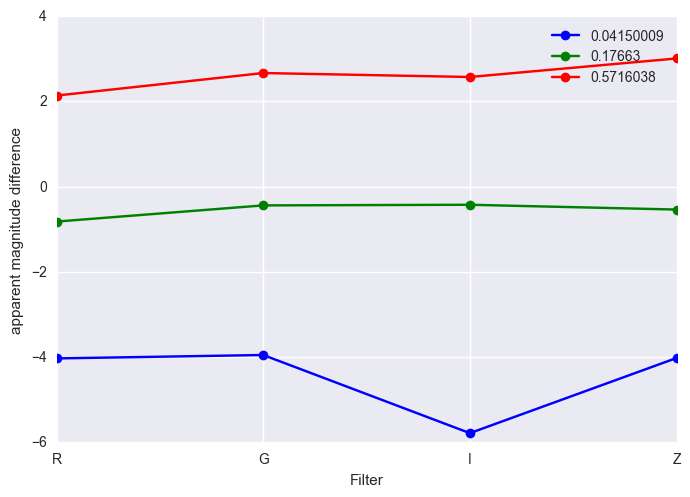

In [4]:
# I HAVE TO DRAW CORNERPLOT NOT THIS

# initialize the histogram
plt.figure()
plt.xlabel("Filter")
plt.ylabel("apparent magnitude difference")
x = np.array([1,2,3,4])
xticks = ['R','G','I','Z']
plt.xticks(x, xticks)
# for each source assign an array
# pick three sources for the quasars
for i, c in zip(range(0,3), ['bo-', 'go-', 'ro-']):
    source = qso[random.randint(0, len(qso))]
    # initialize the numpy array
    magDiff = np.empty(4)
    r_real = source[7]
    g_real = source[8]
    i_real = source[9]
    z_real = source[10]
    redshift = source[13]
    r_calc, g_calc, i_calc, z_calc = color_t.CalculateMagnitude('data', 'source', redshift)
    r_diff = r_calc-r_real
    g_diff = g_calc-g_real
    i_diff = i_calc-i_real
    z_diff = z_calc-z_real
    y_diff = np.array([r_diff,g_diff,i_diff,z_diff])
    lens = plt.plot(x, y_diff, c, label = redshift)
plt.legend()

-0.55364
0.6485
0.38431
[  0.5716038  18.63843    -0.55364     0.6485      0.38431  ]
1
-0.0252789187448
0.212957313919
-0.0506785697009
[  0.5716038   21.20941575  -0.02527892   0.21295731  -0.05067857]


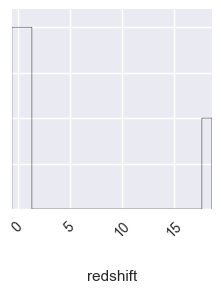

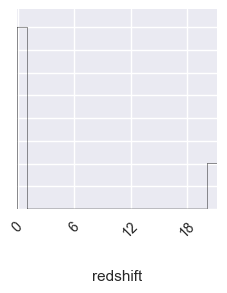

In [5]:
# key for the file: ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z 
r_real = source[7]
g_real = source[8]
i_real = source[9]
z_real = source[10]
redshift = source[13]
make_cornerplot(r_real, g_real, i_real, z_real, redshift)
r_calc, g_calc, i_calc, z_calc = color_t.CalculateMagnitude('data', 'source', redshift)
make_cornerplot(r_calc, g_calc, i_calc, z_calc, redshift)

In [6]:
    """
    Given an arbitrary sample, make a corner plot of the required quantities.
    Parameters
    ----------
    parameters : str, tuple
        Names of the lens parameters to plot
    saveImg : bool
        If true, save image with standardized name.
    IQ : float
        Image quality, for reference.
    fig : matplotlib figure object
        Overlay plot on an existing figure
    Returns
    -------
    fig : matplotlib figure object
        New or updated figure
    """

    #features, labels = extract_features(sample, parameters)
    #features = features[0]

"""   
    redshift = sample['ZLENS']
    imag = sample['i_SDSS']
    gr = sample['g_SDSS']-sample['r_SDSS']
    ri = sample['r_SDSS']-sample['i_SDSS']
    iz = sample['i_SDSS']-sample['z_SDSS']

    moke_features = np.array([redshift, imag, gr, ri, iz])

    # for same lenses, overlap the lenses
    sample_lens = np.loadtxt(real_data)
    # key for the file: ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z   
    redshift = [row[2] for row in sample_lens]
    gmag = [row[4] for row in sample_lens]
    rmag = [row[5] for row in sample_lens]
    imag = [row[6] for row in sample_lens]
    zmag = [row[7] for row in sample_lens]
    gr = gmag-rmag
    ri = rmag-imag
    iz = imag-zmag

    features = np.array([redshift, imag, gr, ri, iz])
        

    labels = np.array(['redshift', 'i-band magnitude', 'g-r', 'r-i', 'i-z'])

    if fig is None:
        fig = corner.corner(moke_features, labels=labels, color=color, smooth=1.0)
        fig = corner.corner(features, labels=labels, color=color, smooth=1.0)
    else:
        _   = corner.corner(moke_features, labels=labels, color=color, smooth=1.0, fig=fig)
        fig = corner.corner(features, labels=labels, color=color, smooth=1.0)

    if saveImg:
        pngfile = "om10_sample.png"
        pylab.savefig(pngfile)
        print "OM10: Sample plot saved to file:", pngfile

    return fig

"""

'   \nredshift = sample[\'ZLENS\']\nimag = sample[\'i_SDSS\']\ngr = sample[\'g_SDSS\']-sample[\'r_SDSS\']\nri = sample[\'r_SDSS\']-sample[\'i_SDSS\']\niz = sample[\'i_SDSS\']-sample[\'z_SDSS\']\n\nmoke_features = np.array([redshift, imag, gr, ri, iz])\n\n# for same lenses, overlap the lenses\nsample_lens = np.loadtxt(real_data)\n# key for the file: ra  dec  z  mag_u  mag_g  mag_r  mag_i  mag_z   \nredshift = [row[2] for row in sample_lens]\ngmag = [row[4] for row in sample_lens]\nrmag = [row[5] for row in sample_lens]\nimag = [row[6] for row in sample_lens]\nzmag = [row[7] for row in sample_lens]\ngr = gmag-rmag\nri = rmag-imag\niz = imag-zmag\n\nfeatures = np.array([redshift, imag, gr, ri, iz])\n    \n\nlabels = np.array([\'redshift\', \'i-band magnitude\', \'g-r\', \'r-i\', \'i-z\'])\n\nif fig is None:\n    fig = corner.corner(moke_features, labels=labels, color=color, smooth=1.0)\n    fig = corner.corner(features, labels=labels, color=color, smooth=1.0)\nelse:\n    _   = corner.corn